In [5]:
import hoomd
import hoomd.md
import numpy
#import utils
import hoomd.deprecated

In [19]:
hoomd.context.initialize("")

In [20]:
#Lx = 20
#a = hoomd.data.boxdim(Lx = Lx, Ly = Lx, Lz = Lx)
#N = utils.ParticleCalc(0.01,Lx)
#print(N)

In [21]:
#snapshot = hoomd.data.make_snapshot(N=N, box = a,
#                                   particle_types=['A'])

In [31]:
#hoomd.deprecated.init.create_random(N, phi_p=None, name='A', min_dist=0.7, box=None, seed=1, dimensions=3)

sim = hoomd.deprecated.init.create_random(N = 500, phi_p = 0.1, name = 'A', dimensions = 3, min_dist=1.1)

notice(2): Group "all" created containing 500 particles


In [ ]:
# for i in range(N):
#    snapshot.particles.position[i] = utils.randNumGen(Lx)
# print(snapshot.particles.position)

In [23]:
# my_velocity = numpy.random.random((N,3)) * 2 - 1
# sim.velocity[:] = my_velocity[:]

In [24]:
#snapshot.particles.mass[:] = 1.0

In [25]:
#hoomd.init.read_snapshot(snapshot)

In [32]:
nl = hoomd.md.nlist.cell()

In [33]:
lj = hoomd.md.pair.lj(r_cut = 2.5, nlist = nl)
lj.set_params(mode="xplor")

In [34]:
lj.pair_coeff.set('A', 'A', epsilon = 1.0, sigma = 1.0)

In [35]:
hoomd.md.integrate.mode_standard(0.005)

In [36]:
all = hoomd.group.all()
integrater = hoomd.md.integrate.nvt(group = all, kT = 0.9, tau = 0.5)
integrater.randomize_velocities(123)

In [37]:
hoomd.analyze.log(filename = "DensityAttempt2-output.log",
                 quantities = ['potential_energy', 'temperature'],
                 period = 500,
                 overwrite = True)

In [38]:
hoomd.dump.gsd("DensityAttempt2Outputs.gsd", period = 500, group = all, overwrite = True)
hoomd.dump.gsd("DensityAttempt2Inputs.gsd", period = None, group = all, overwrite = True)

In [39]:
hoomd.run(1e5)

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 500
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:18 | Step 9757 / 100000 | TPS 975.523 | ETA 00:01:32
Time 00:00:28 | Step 19527 / 100000 | TPS 976.94 | ETA 00:01:22
Time 00:00:38 | Step 29542 / 100000 | TPS 1001.28 | ETA 00:01:10
Time 00:00:48 | Step 39429 / 100000 | TPS 988.7 | ETA 00:01:01
Time 00:00:58 | Step 49225 / 100000 | TPS 979.562 | ETA 00:00:51
Time 00:01:08 | Step 58905 / 100000 | TPS 967.949 | ETA 00:00:42
Time 00:01:18 | Step 68274 / 100000 | TPS 936.819 | ETA 00:00:33
Time 00:01:28 | Step 77450 / 100000 | TPS 917.579 | ETA 00:00:24
Time 00:01:38 | Step 86512 / 100000 | TPS 905.797 | ETA 00:00:14
Time 00:01:48 | Step 95382 / 100000 | TPS 886.981 | ETA 00:00:05
Time 00:01:53 | Step 100000 / 100000 | TPS 915.77 | ETA 00:00:00
Average TPS: 951.808
---------
-- Neighborlist s

In [40]:
from matplotlib import pyplot
data = numpy.genfromtxt(fname='DensityAttempt2-output.log', skip_header = True)

[[ 2.00000000e+04 -1.18523513e+03  9.40841085e-01]
 [ 2.05000000e+04 -1.16118218e+03  8.90016114e-01]
 [ 2.10000000e+04 -1.20234776e+03  8.82804162e-01]
 [ 2.15000000e+04 -1.07994734e+03  8.92698814e-01]
 [ 2.20000000e+04 -1.18521429e+03  8.51048714e-01]]


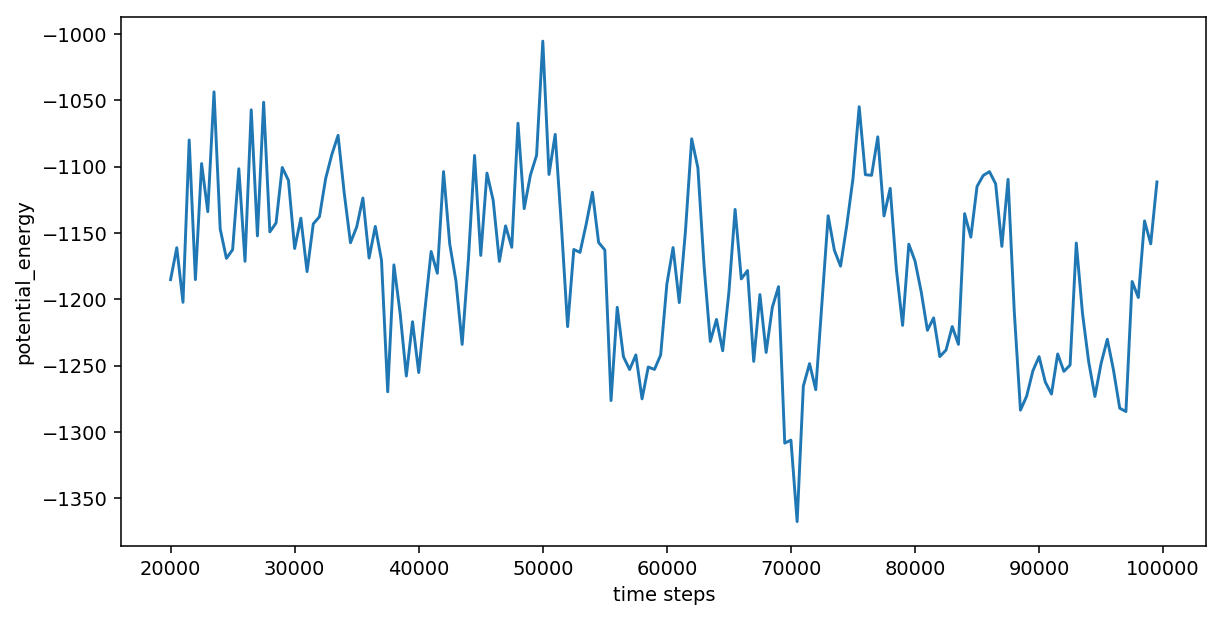

In [44]:
pyplot.figure(figsize=(10,5), dpi = 140)
pyplot.plot(data[40:,0], data[40:,1])
pyplot.xlabel('time steps')
pyplot.ylabel('potential_energy')
print(data[40:45])

Text(0,0.5,'temperature')

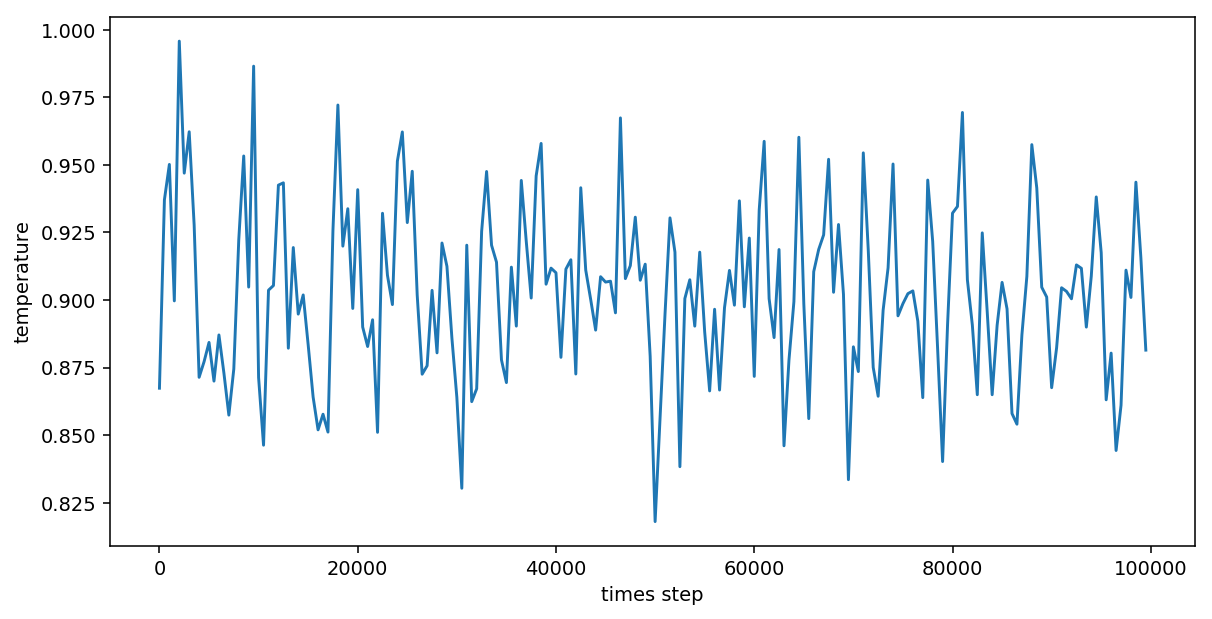

In [42]:
pyplot.figure(figsize=(10,5), dpi = 140)
pyplot.plot(data[:,0], data[:,2])
pyplot.xlabel('times step')
pyplot.ylabel('temperature')